<a href="https://colab.research.google.com/github/jgp20/HCSPD2024/blob/main/Visualizaci%C3%B3n_en_Colab_y_en_Python_interactiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visualización en Colab y en Python interactiva

Se deben cargar librerías de visualización de Pyhton, como Matplotlib y Plotly. La primera es muy rápida y la segunda permite hacer zoom en alguna zona de interés.

In [ ]:
!apt install octave #Instala colab en el entorno de trabajo

In [2]:
%%writefile Avion_Num.m
clc;clear all;
warning('off','all');
X=-[0; 0;0;0];t_etapa=10e-3;
tF=5;
color_='r';
color='b';
Ts=t_etapa;
u=1;
ii=0;
for t=0:t_etapa:tF
  ii=ii+1;
  x2(ii)=X(2);%Ángulo fi
  x4(ii)=X(4);%tensión en el capacitor
  X=modavion(t_etapa, X, u);
  acc(ii)=u;
end
t=0:t_etapa:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(3,1,1);hold on;
plot(t,x2,color_);title('x_2 angulo fi'); hold on;
%plot(t,x1_analitica,color);title('x_1 corriente'); hold on;
subplot(3,1,2);hold on;
plot(t,x4,color_);title('x_4 Altura');
subplot(3,1,3);hold on;
plot(t,acc,color_);title('Entrada u_t, v_a');
xlabel('Tiempo [Seg.]');
%figure(1)
%figure(2)
print(hfig1,'VarsAvion_temporal','-r300','-dpng');
save('Verificacion_Num_1Avion.mat','-v7');

Writing Avion_Num.m


In [3]:
%%writefile modavion.m
%Funcion modelo
function [X]=modavion(t_etapa, xant, accion)
%xant=[alfa,fi,fi_p,h]
a=0.01; b=2; c=100;
omega=0.2;
At=1e-3;
u=accion;
%xant=[alfa,fi,fi_p,h]
alfa=xant(1);
fi=xant(2);
fi_p=xant(3);
h=xant(4);
x=xant;
for ii=1:t_etapa/At
  %xp=A*x+B*u;
  alfa_p=a*(fi-alfa);
  fi_pp=(-omega^2)*(fi-alfa-b*u);
  h_p=c*alfa;
  xp=[alfa_p;fi_p;fi_pp;h_p];
  x=x+xp*At;
  fi_p=xp(2);
  alfa=x(1);
  fi=x(2);
  fi_p=x(3);
  h=x(4);
end
X=[x]; %

Writing modavion.m


In [4]:
# -W : no window system
!octave -W Avion_Num.m


Se deben cargar librerías de visualización de Pyhton, como Matplotlib y Plotly. La primera es muy rápida y la segunda permite hacer zoom en alguna zona de interés.

In [5]:
import numpy as np
import scipy.io
import pandas as pd
from matplotlib import pyplot as plt
import plotly.graph_objects as go

In [11]:
#Importa los datos que se generaron desde Octave en el archivo .mat simulación de 5 segundos
mat = scipy.io.loadmat('/content/Verificacion_Num_1Avion.mat')
t=mat.get('t')  # Seleccionar celda y colocar mouse sobre t, observar caracteristicas del array
x2=mat.get('x2') # Seleccionar celda y colocar mouse sobre x2, observar caracteristicas del array
x4=mat.get('x4') # Seleccionar celda y colocar mouse sobre x4, observar caracteristicas del array
acc=mat.get('acc') # Seleccionar celda y colocar mouse sobre acc, observar caracteristicas del array
# plot(t,x2,color_);title('x_2 angulo fi');
# plot(t,x4,color_);title('x_4 Altura');
# plot(t,acc,color_);title('Entrada u_t, v_a');
# Siempre conviene armar un DataFrame para graficar y procesar los datos
df = pd.DataFrame({'t': t[0], 'Angulo fi': x2[0], 'x4': x4[0], 'acc': acc[0]}) # Seleccionar celda y colocar mouse sobre df, observar caracteristicas del array y oprimir view
# 't' , 'Angulo fi' , 'x4' , 'acc' nombre que asigno a los vectores t, x2, x4 y acc, pero se debe utilizar t[0], x2[0], x4[0] y acc[0]

In [ ]:
df.tail(3) #Verificar que sea correcto y consistente el DataFrame. Veo la últimas tres filas

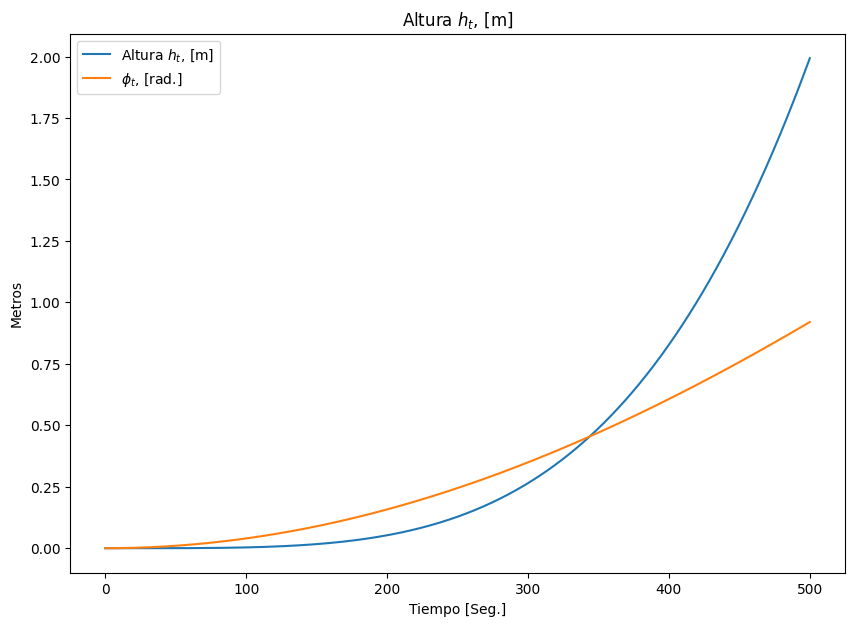

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(df.index, df['x4'], label='Altura $h_t$, [m]')
plt.plot(df.index, df['Angulo fi'], label='$\phi_t$, [rad.]')
plt.title('Altura $h_t$, [m]')
plt.xlabel('Tiempo [Seg.]')
plt.ylabel('Metros')
plt.legend()
plt.show()

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Angulo fi'], mode='lines', name='Ángulo $\phi_t$'))
fig.add_trace(go.Scatter(x=df.index, y=df['x4'], mode='lines', name='Altura $h_t$'))
# Customize the layout
fig.update_layout(title='Simulación del avión',
                  xaxis_title='Tiempo [Seg.]',
                  yaxis_title='Valores',
                  legend_title='Variables',
                  showlegend=True)
# Display the interactive Plotly chart
fig.show()  # puedo hacer zoom